In [1]:
import datajoint as dj

In [2]:
_db_prefix = 'aeon_'

acquisition = dj.create_virtual_module("acquisition", _db_prefix + "acquisition")
analysis = dj.create_virtual_module("analysis", _db_prefix + "analysis")
lab = dj.create_virtual_module("lab", _db_prefix + "lab")
subject = dj.create_virtual_module("subject", _db_prefix + "subject")
tracking = dj.create_virtual_module("tracking", _db_prefix + "tracking")

Connecting jburling@localhost:3306


In [3]:
lab.schema.spawn_missing_classes()
subject.schema.spawn_missing_classes()
acquisition.schema.spawn_missing_classes()
tracking.schema.spawn_missing_classes()
analysis.schema.spawn_missing_classes()

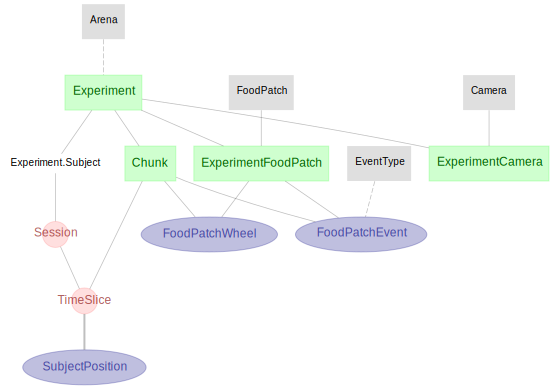

In [5]:
diagram = (
    dj.Diagram(acquisition.Session)
    + lab.Arena
    + lab.FoodPatch
    + lab.Camera
    + acquisition.ExperimentCamera
    + acquisition.FoodPatchWheel
    + acquisition.FoodPatchEvent
    + acquisition.EventType 
    + acquisition.Experiment
    + tracking.SubjectPosition
)

diagram

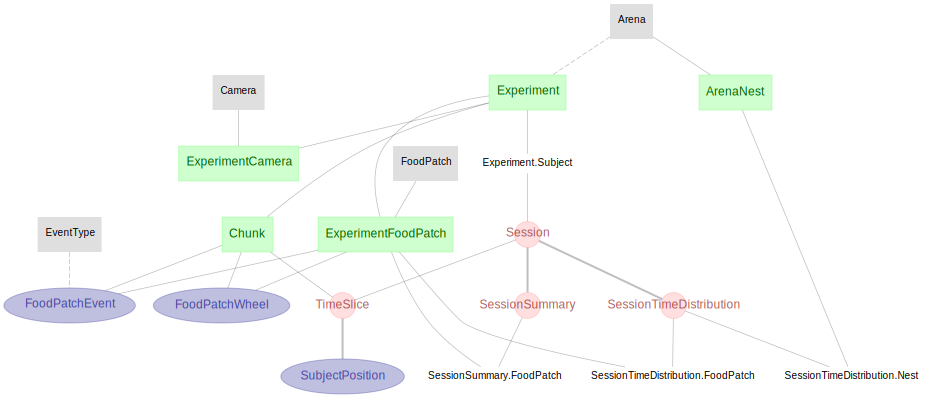

In [5]:
diagram = (
    dj.Diagram(acquisition.Session)
    + lab.Arena
    + lab.FoodPatch
    + lab.Camera
    + acquisition.ExperimentCamera
    + acquisition.FoodPatchEvent
    + acquisition.FoodPatchWheel
    + acquisition.Experiment
    + acquisition.EventType 
    + tracking.SubjectPosition
    + analysis.SessionTimeDistribution
    + analysis.SessionTimeDistribution.FoodPatch
    + analysis.SessionTimeDistribution.Nest
    + analysis.SessionSummary
    + analysis.SessionSummary.FoodPatch
)

diagram

In [6]:
diagram.save("aeon/dj_pipeline/docs/notebooks/diagram.svg")